In [1]:
import pandas as pd
import numpy as np
import json
from Bio import SeqIO
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Import organized Auspice data
df = pd.read_csv('../dataframes/auspice_df.csv', index_col=0)
egg_df = pd.read_csv('../dataframes/egg_df.csv', index_col=0)

In [12]:
#Define positions
positions= [194,186,160,225,219,156,203,138]

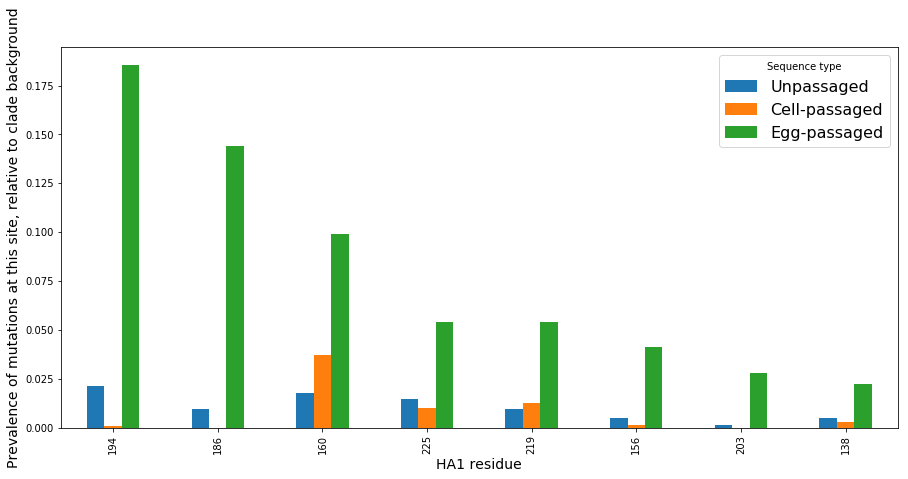

In [13]:
#A. Most prevalent egg-passaged mutations
mut_prev_df = pd.DataFrame()
for p in positions:
    mut_prev= df.groupby('passage')['mut'+str(p)].value_counts(normalize=True)
    mut_prev.name= 'mut_prev'+str(p)
    mut_prev = mut_prev.reset_index().set_index('passage')
    mut_prev_df[p] = mut_prev[mut_prev['mut'+str(p)]==1]['mut_prev'+str(p)]

fig, ax = plt.subplots(figsize=(15,7))
fig = mut_prev_df.T.plot(kind='bar', ax=ax)
plt.xlabel('HA1 residue', size=14)
plt.ylabel('Prevalence of mutations at this site, relative to clade background', size=14)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ["Unpassaged", "Cell-passaged", "Egg-passaged"], title='Sequence type', loc=1, fontsize=16)

Text(0,0.5,u'Number of egg-passaged sequences')

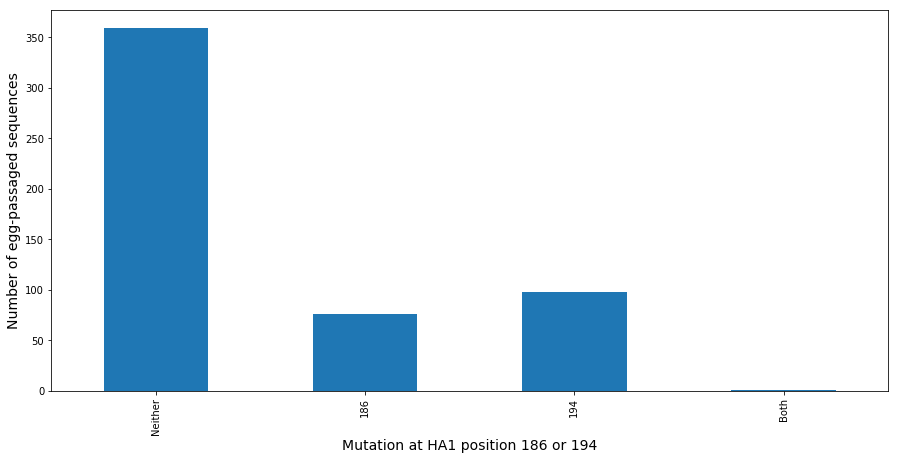

In [108]:
#B. Mutations at sites 194 and 186 are mutually exclusive
b_group = egg_df.groupby(['mut194', 'mut186'])['strain'].agg('count').to_frame()
b_group.index= b_group.index.map('{0[0]}/{0[1]}'.format)
b_group.index= ['Neither', '186', '194', 'Both']
b_group.rename(columns={'strain':'Prevalence'})

fig, ax = plt.subplots(figsize=(15,7))
fig = b_group.plot(kind='bar', ax=ax, legend=False)
plt.xlabel('Mutation at HA1 position 186 or 194', size=14)
plt.ylabel('Number of egg-passaged sequences', size=14)

In [148]:
#C. Positions 156 and 219 do not mutate if 194 is mutated. 225 is more general/prevasive
# c_df = egg_df[egg_df['mut194']==1].groupby(['mut156', 'mut219', 'mut225'])['mut194'].value_counts()
# c_df.name = 'prev'
# c_df = c_df.reset_index()
# c_df
c_df = egg_df[egg_df['mut194']==1].groupby('mut156')['mut194'].value_counts()
d_df = egg_df[egg_df['mut194']==1].groupby('mut219')['mut194'].value_counts()
cc_df = pd.DataFrame(c_df, d_df)


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

In [ ]:
#D. 94% of seqs with mutation at 156 and/or 219 also have mut at 186

Text(0,0.5,u'Proportion of sequences with mutation at position 194 or 186')

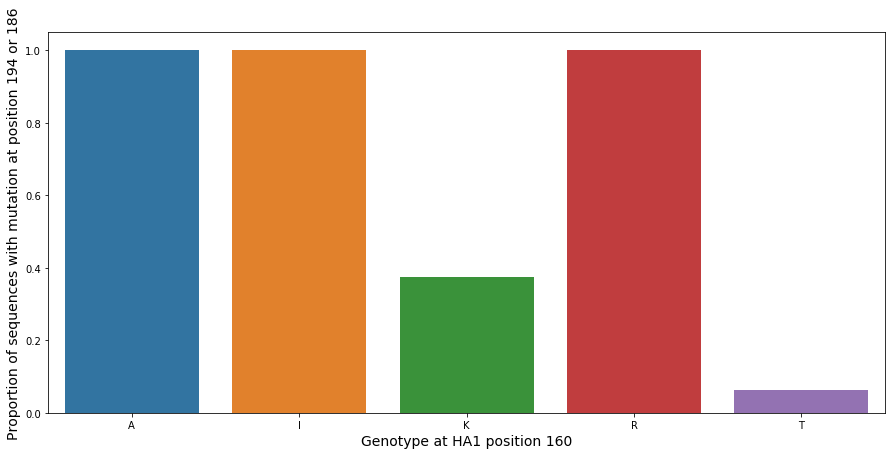

In [192]:
#E. Mutations occur preferentially in strains with 160 NOT = T

#Add column that is True is either 194 or 186 is mutated
egg_df['mut194_186']=np.select(((egg_df.mut194==1)|(egg_df.mut186==1), (egg_df.mut194==0)&(egg_df.mut186==0)), (True, False))

e_group = egg_df.groupby('160')['mut194_186'].value_counts(normalize=True)
e_dict = {}
for (aa, mut), g in e_group.iteritems():
    if mut==True:
        e_dict[aa]=[g]

e_df = pd.DataFrame(e_dict).T.reset_index().rename(columns={'index':'160_aa', 0:'y'})
fig, ax = plt.subplots(figsize=(15,7))
fig = sns.barplot(x='160_aa', y='y', data=e_df, ax=ax)

plt.xlabel('Genotype at HA1 position 160', size=14)
plt.ylabel('Proportion of sequences with mutation at position 194 or 186', size=14)

Text(0,0.5,u'Proportion of sequences with mutation at position 194 or 186')

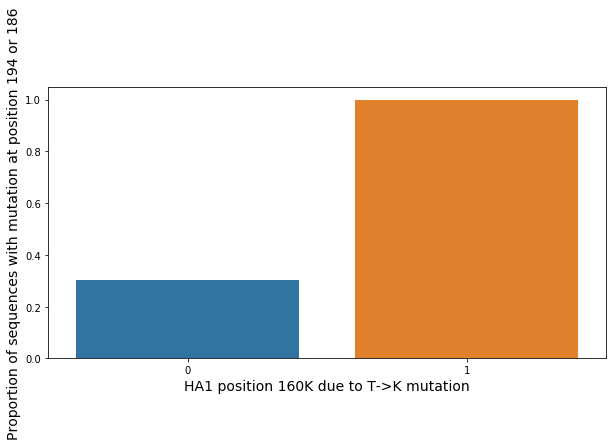

In [194]:
#F. 100% of T160K seqs mutate at an additional site (compared with 31% of other 160K seqs)

f_group = egg_df[egg_df['160']=='K'].groupby('mut160')['mut194_186'].value_counts(normalize=True)


f_dict = {}
for (aa, mut), g in f_group.iteritems():
    if mut==True:
        f_dict[aa]=[g]
        
f_df = pd.DataFrame(f_dict).T.reset_index().rename(columns={'index':'t160k_mutation', 0:'y'})
fig, ax = plt.subplots(figsize=(10,5))
fig = sns.barplot(x='t160k_mutation', y='y', data=f_df, ax=ax)

plt.xlabel('HA1 position 160K due to T->K mutation', size=14)
plt.ylabel('Proportion of sequences with mutation at position 194 or 186', size=14)

In [14]:
egg_df.groupby(['160','mut160','mut194','mut186','mut156', 'mut219', 'mut225'])['strain'].agg('count')

160  mut160  mut194  mut186  mut156  mut219  mut225
A    1       0       1       0       0       1           1
             1       0       0       0       1           1
I    1       0       1       0       1       1           1
             1       0       0       0       0           2
                                             1           1
K    0       0       0       0       0       0         260
                                             1           5
                             1       0       0           1
                                             1           2
                                     1       0           1
                     1       0       0       0          28
                                             1           2
                                     1       0          21
                             1       0       0          11
                                             1           1
                                     1       0           4
    